## Una introducción a los Ensambles

Dependiendo de la tarea a realizar se han estudiado distintos algortimos. 

* Regresión:

  1.   Regresión lineal
  2.   Regresión Polinomial
  3.   Máquinas de soporte vectorial
  4.   Redes Neuronales

* Clasificación

  1.   Regresión logística
  2.   Redes neuronales
  3.   Máquinas de soporte vectorial
  4.   Arboles de decisión

Cada algoritmo tiene ventajas y desventajas. Dependiendo de la distribución de los datos, cada algoritmo tiene un grado de presición. 

Aprendizaje por ensamble es un paradigma de machine learning que consiste en combinar varios algoritmos para mejorar la presición de la tarea que se quiere realizar.

Existen dos grandes problemas en los algoritmos que hemos estudiado: 

1.  Underfitting
2.  Overfitting

<center>
    <img src="https://image.slidesharecdn.com/dlai2017d6l2methodology-171113090926/95/methodology-dlai-d6l2-2017-upc-deep-learning-for-artificial-intelligence-14-638.jpg?cb=1510564325">
</center>

Los Algoritmos de ensamble más utilizados se pueden dividir en dos categorías

* Aprendizaje por ensamble sequencial (Boosting)
* Aprendizaje por ensamble paralelo (Bagging)



### Aprendizaje por ensamble sequencial (Boosting)

Boosting son una serie de algoritmos que consisten en combinar los resultados de varios algoritmos para producir un resultado superior.

Observemos la siguiente imagen

<center>
    <img src="https://miro.medium.com/max/875/0*KcQZgCA34Cggnrso.png">
</center>


El objetivo del Boosting es solucionar el Underfitting y Overfitting 


* Ejemplo: Clasificador en cascada

La idea de un clasificador en cascada es tener varios clasificadores ("clasificadores débiles") y mejorar la presición global del boosting ("clasificador fuerte") entrenando cada clasificador débil secuencialmente  

<center>
    <img src="https://miro.medium.com/max/875/1*6K68kg83UN_sL-hx5jiYeQ.png" width="75%">
</center>

Una de las aplicacines más importantes del boosting es el algoritmo de Viola-Jones

<center>
    <img src="https://miro.medium.com/max/4096/1*yEAd5GgzwVQFDY7X5zpnFQ.jpeg" width="70%">
</center>

<center>
    <img src="https://www.researchgate.net/profile/Randy_Broussard/publication/268348020/figure/fig1/AS:295426394738690@1447446549168/Haar-features-used-for-Viola-Jones-face-detection-method.png" width="50%">
</center>



### Aprendizaje por ensamble paralelo (Bagging)

Bagging son una serie de algoritmos cuya estrategía es promediar u obtener el valor máximo de los resultados de una serie de algoritmos entrenados para cumplir una misma tarea.

Observemos la siguiente imagen:

<center>
    <img src="https://lh3.googleusercontent.com/proxy/dyCCaL_mlN6KnpAvgiO9IbHrfcQpxVVLyUsdbmGOyk970LXf8-6UM0EgC7Rj7t2e3qnG8X5hKanox1oC34h0FSB3WakGWCdc9KWOnwRA1ucnw-1Cs_SiAhzAAvPiHL0EkiCy_WpBdPoHEIldknBEDfC26DyP2BFQPctinVhv132xJw4HjqjrcEhW4MqpiTbsHifKGZYwg5z_ZfDSWKFGcaS5fzIB6BOm9BlHq1SDWnSCzj94HuclrinB31MH-mRYA_3f7VF7azx75ZNFLEYbqtAePXA">
</center>

La predicción del clasificador fuerte puede ser:

* El promedio de los clasificadores débiles
* El clasificador más fuerte


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ROCAUC
from sklearn import preprocessing
from sklearn import metrics
import xgboost
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
plt.rcParams["font.size"] = 24
plt.style.use("seaborn-poster")

In [ ]:
wine = datasets.load_wine()
columns = list(wine.keys())

In [ ]:
columns

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [ ]:
xs = wine["data"][:, 0:5]
ys = wine["target"]
xs.shape

(178, 5)

In [ ]:
data_names = [
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline",
]
data_names = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium"]
target_names = {0: 0, 1: 1, 2: 1}

In [ ]:
X = pd.DataFrame(data=xs, columns=data_names)
X.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573
std,0.811827,1.117146,0.274344,3.339564,14.282484
min,11.030000,0.740000,1.360000,10.600000,70.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000


In [ ]:
# The commented lines performs a data conversion into a binary classification problem
# y_binary = []
# for i in range(len(ys)):
#     y_binary.append(target_names[ys[i]])
y = pd.DataFrame(data=ys, columns=["target"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sca = preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = sca.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [ ]:
bm = DummyClassifier()
bm.fit(X_train, y_train.values.ravel())
metrics.precision_score(y_test, bm.predict(X_test), average="weighted")

0.266358024691358

In [ ]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [ ]:
for model in [
    DummyClassifier,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier,
]:
    cls = model()
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    s = model_selection.cross_val_score(cls, X, y.values.ravel(), scoring="accuracy", cv=kfold)
    print(f"{model.__name__:22} AUC: " f"{s.mean():.3f} STD: {s.std():.2f}")

DummyClassifier        AUC: 0.342 STD: 0.04
DecisionTreeClassifier AUC: 0.786 STD: 0.06
KNeighborsClassifier   AUC: 0.831 STD: 0.06
GaussianNB             AUC: 0.837 STD: 0.05
SVC                    AUC: 0.865 STD: 0.04
RandomForestClassifier AUC: 0.837 STD: 0.07
XGBClassifier          AUC: 0.837 STD: 0.09


In [ ]:
gb = DecisionTreeClassifier()
gb.fit(X_train, y_train.values.ravel())
y_pred = gb.predict(X_test).reshape(-1, 1)
print(f"{'DecisionTreeClassifier':22} AUC: " f"{metrics.accuracy_score(y_test, y_pred):.1f}")

DecisionTreeClassifier AUC: 0.8


In [ ]:
# Only for binary classification problems uncomment this line
# metrics.roc_auc_score(y_test, y_pred)

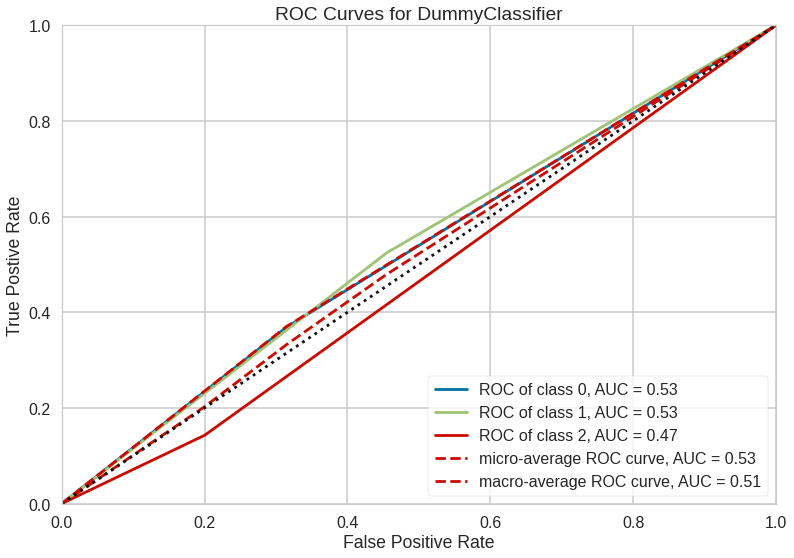

In [ ]:
gb = DummyClassifier()
roc_viz = ROCAUC(gb)
roc_viz.fit(X_train, y_train.values.ravel())
roc_viz.score(X_test, y_test)
roc_viz.poof()

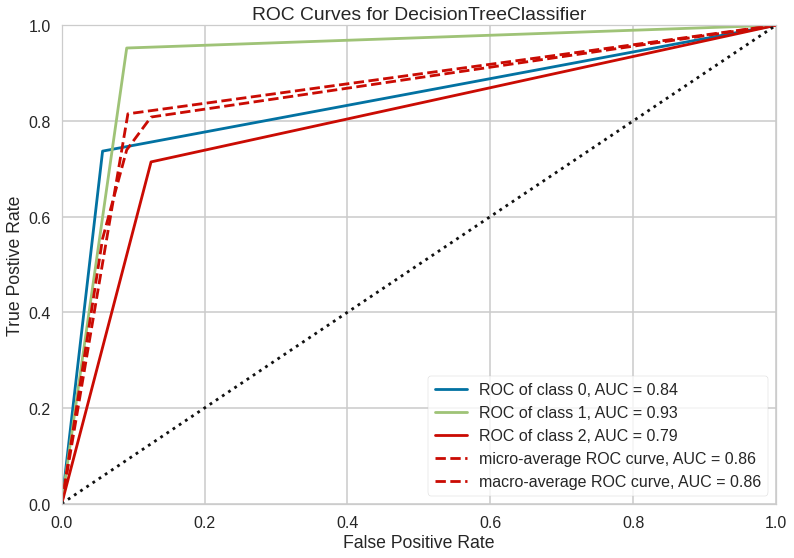

In [ ]:
gb = DecisionTreeClassifier()
roc_viz = ROCAUC(gb)
roc_viz.fit(X_train, y_train.values.ravel())
roc_viz.score(X_test, y_test)
roc_viz.poof()

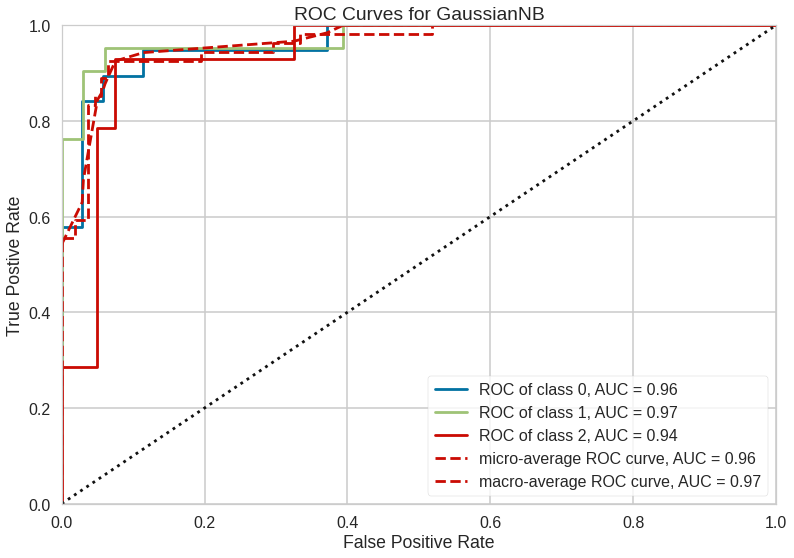

In [ ]:
gb = GaussianNB()
roc_viz = ROCAUC(gb)
roc_viz.fit(X_train, y_train.values.ravel())
roc_viz.score(X_test, y_test)
roc_viz.poof()

In [ ]:
gaussian_clf = GaussianNB()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()


def load_stack_model():
    voting_clf = VotingClassifier(
        estimators=[("GaussianNB", gaussian_clf), ("rf", rnd_clf), ("svc", svm_clf)], voting="hard"
    )
    return voting_clf


voting_clf = load_stack_model()
voting_clf.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('GaussianNB',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                            

In [ ]:
for clf in (gaussian_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f"{metrics.accuracy_score(y_test, y_pred):.4f}")

GaussianNB 0.8889
RandomForestClassifier 0.8333
SVC 0.8519
VotingClassifier 0.8519


In [ ]:
from sklearn.datasets import make_circles

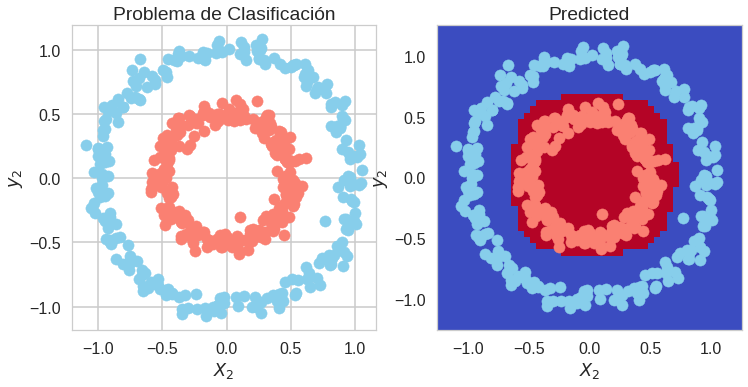

In [ ]:
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]

ig, axs = plt.subplots(1, 2, figsize=(12, 10))

axs[0].scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], label="Clase 0", color="skyblue", marker="o")
axs[0].scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], label="Clase 1", color="salmon", marker="o")
axs[0].set_title("Problema de Clasificación")
axs[0].set(xlabel="$X_{2}$", ylabel="$y_{2}$")
axs[0].ticklabel_format(style="plain")
# ig.legend()
axs[0].grid("none")
axs[0].axis("square")

y_train = pd.DataFrame(Y)

voting_clf = load_stack_model()
voting_clf.fit(X, y_train.values.ravel())

y_pred = np.zeros((50, 50))

x = np.linspace(-1.25, 1.25, 50)
y = np.linspace(-1.25, 1.25, 50)

for i0, x0 in enumerate(x):
    for i1, x1 in enumerate(y):
        y_pred[i0, i1] = voting_clf.predict(np.array([[x0, x1]]))

axs[1].pcolormesh(x, y, y_pred, cmap="coolwarm")
axs[1].set(xlabel="$X_{2}$", ylabel="$y_{2}$")
axs[1].scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], color="skyblue", marker="o")
axs[1].scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], color="salmon", marker="o")
axs[1].set_title("Predicted")
axs[1].ticklabel_format(style="plain")
axs[1].axis("square")

ig.show()